In [1]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Total users in the dataset

In [3]:
users_path = '/content/drive/MyDrive/CMPE256/Data/yelp_academic_dataset_user.json'

In [4]:
users_ll = []
with open(users_path, encoding = 'utf-8') as fin:
    for line in fin:
        line_contents = json.loads(line)
        users_ll.append(line_contents)
print("Total users in the dataset are: {count}".format(count=len(users_ll)))

Total users in the dataset are: 1987897


# Study attributes of users 

In [15]:
users = pd.DataFrame(users_ll)
users.shape

(1987897, 22)

In [13]:
users.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

## Filter out users of California only
We have done this because:
1. The dataset is huge. It is difficult to work with it because of the RAM and CPU limitations of our local machine
2. To Study the data that is geographically relevant to us- California.

In [14]:
ca_review_path = '/content/drive/MyDrive/CMPE256/Data/CSVfiles/California_reviews.csv'
reviews = pd.read_csv(ca_review_path)
user_ids = reviews.user_id
users_ca = users[users['user_id'].isin(user_ids)]
users_ca.shape

(115258, 22)

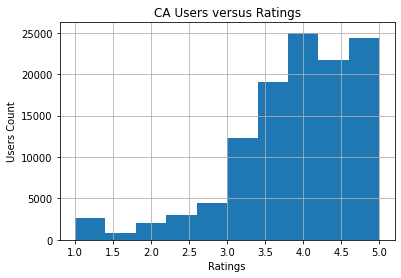

In [22]:
users_ca.average_stars.hist()
plt.xlabel("Ratings")
plt.ylabel("Users Count")
plt.title('CA Users versus Ratings')
plt.savefig("EDA_CA_Users_versus_Ratings.png")

## Removing users with zero reviews

In [26]:
print("Number of users with zero reviews:")
len(users_ca.loc[users_ca['review_count'] == 0])

Number of users with zero reviews:


2

In [28]:
users_ca = users_ca[users_ca.review_count != 0]
users_ca.shape

(115256, 22)

##Studying users based on review count

In [40]:
## counting users with less than and more than 100 reviews
less_than_100 = len(users_ca.loc[users_ca['review_count'] < 100])
more_than_1000 = len(users_ca.loc[users_ca['review_count'] >= 1000])
more_than_100 = len(users_ca.loc[users_ca['review_count'] >= 100])

print('Users with reviews count less than 100 = ', less_than_100)
print('Users with reviews count more than 100 but less than 1000 = ', more_than_100 - more_than_1000)
print('Users with reviews count more than 1000 = ', more_than_1000)

Users with reviews count less than 100 =  100229
Users with reviews count more than 100 but less than 1000 =  14381
Users with reviews count more than 1000 =  646


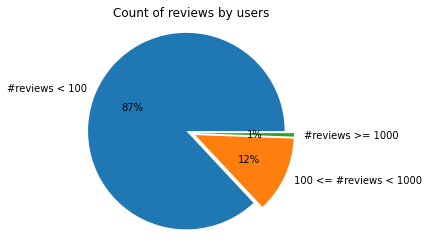

In [52]:
my_data = [less_than_100, more_than_100 - more_than_1000, more_than_1000]
my_labels = '#reviews < 100','100 <= #reviews < 1000','#reviews >= 1000'
explode = (0.05, 0.05, 0.05)
plt.pie(my_data,labels=my_labels, autopct='%1.0f%%', explode = explode)
plt.title('Count of reviews by users')
plt.axis('equal')
plt.savefig("EDA_Count_of _reviews_by_users.png")

##Studying the correlation of attributes with average_stars

In [53]:
users_ca.corr()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
review_count,1.000000,0.540995,0.435248,0.473380,0.615385,-0.009971,0.318004,0.305656,0.230041,0.254157,0.224115,0.405691,0.350041,0.348740,0.348740,0.352132,0.227447
useful,0.540995,1.000000,0.972868,0.994561,0.700777,-0.003421,0.710051,0.758126,0.618678,0.527670,0.570402,0.791438,0.803217,0.818877,0.818877,0.797705,0.778783
funny,0.435248,0.972868,1.000000,0.982705,0.623132,-0.003127,0.737790,0.831747,0.687966,0.581231,0.642246,0.804015,0.820797,0.852136,0.852136,0.855258,0.826962
cool,0.473380,0.994561,0.982705,1.000000,0.655107,0.000646,0.720002,0.771288,0.632516,0.533157,0.579811,0.789835,0.804497,0.830702,0.830702,0.805028,0.805598
fans,0.615385,0.700777,0.623132,0.655107,1.000000,0.002849,0.524602,0.462436,0.366308,0.442316,0.367575,0.640898,0.663013,0.563846,0.563846,0.540684,0.399829
average_stars,-0.009971,-0.003421,-0.003127,0.000646,0.002849,1.000000,-0.000763,-0.003738,-0.001904,-0.002059,-0.002990,-0.003122,0.000691,-0.000875,-0.000875,-0.002841,0.001203
compliment_hot,0.318004,0.710051,0.737790,0.720002,0.524602,-0.000763,1.000000,0.805731,0.802212,0.817765,0.718932,0.869116,0.790647,0.922863,0.922863,0.827653,0.792757
compliment_more,0.305656,0.758126,0.831747,0.771288,0.462436,-0.003738,0.805731,1.000000,0.917566,0.796732,0.884146,0.841421,0.831594,0.899007,0.899007,0.930060,0.845475
compliment_profile,0.230041,0.618678,0.687966,0.632516,0.366308,-0.001904,0.802212,0.917566,1.000000,0.880204,0.950388,0.745703,0.755691,0.846070,0.846070,0.828578,0.805419
compliment_cute,0.254157,0.527670,0.581231,0.533157,0.442316,-0.002059,0.817765,0.796732,0.880204,1.000000,0.871543,0.711573,0.665239,0.763484,0.763484,0.702371,0.675907


Droping the columns which have very less <(0.0010) correlation with average_stars

In [55]:
users_ca = users_ca.drop(['cool', 'compliment_hot','compliment_plain', 'compliment_cool','compliment_funny'], axis=1)

In [56]:
users_ca.head(5)

,user_id,name,review_count,yelping_since,useful,funny,elite,friends,fans,average_stars,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,65,55,56,18,232,239,180
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,4,1,6,2,12,10,9
5,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,3.85,163,191,361,147,1212,815,323
10,iYzhPPqnrjJkg1JHZyMhzA,Chris,4,2010-11-03 18:59:20,1,0,,"Vq4Pc81l6MWTnc-h41YE-Q, ArMLZPW4GljwhopfoQA-uw...",1,4.00,0,0,0,0,0,0,0
18,QF1Kuhs8iwLWANNZxebTow,Catherine,607,2009-04-27 20:25:54,4573,3714,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","dLts9bY66tXEFqYG03YFgw, SYDGMC7d5NnMiT1l_WQq5A...",131,4.11,79,68,29,23,144,587,723


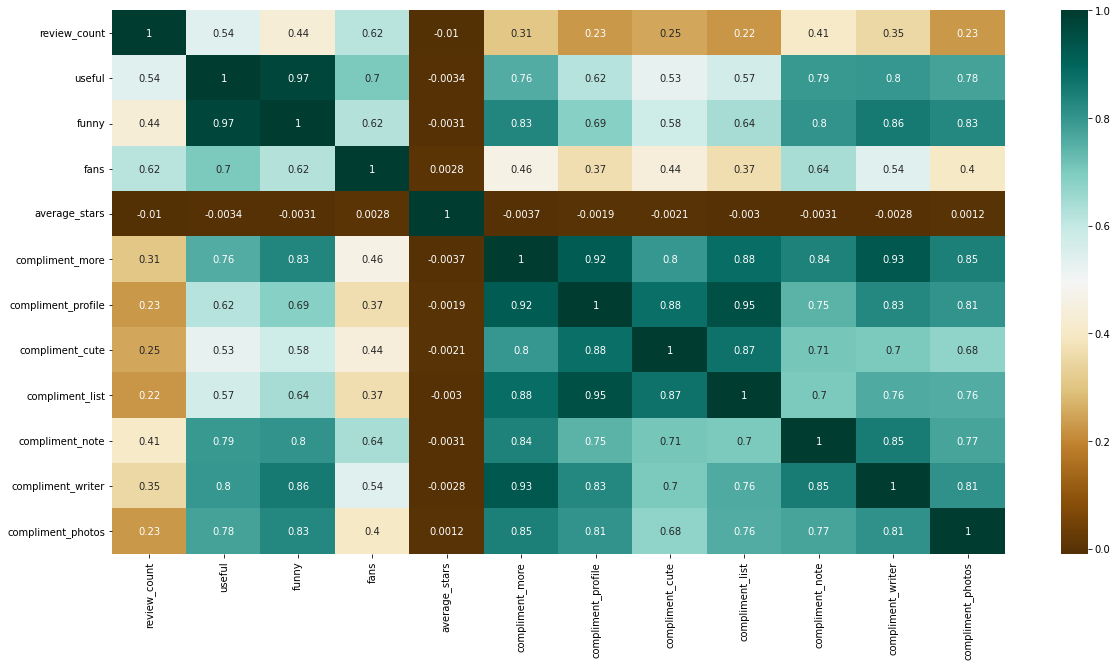

In [57]:
plt.figure(figsize=(20,10))
cor_matrix = users_ca.corr()
sns.heatmap(cor_matrix, cmap= "BrBG", annot=True)